In [1]:
from datetime import datetime, date
import pandas as pd
from dateutil.relativedelta import relativedelta
import numpy as np
import statistics
from calendar import monthrange
import matplotlib.pyplot as plt 

In [2]:
load_filename = 'sh.xlsx'
df = pd.read_excel(load_filename)
print(df)

       Unnamed: 0           name                date  score  \
0               0     Iol Runner 2022-03-21 11:14:11      1   
1               1  블랙큐브BlackCube 2022-03-21 10:51:32      1   
2               2            김문기 2022-03-20 23:34:15      1   
3               3       -에리 백현엑소 2022-03-20 20:37:54      1   
4               4           옛날치킨 2022-03-20 19:40:58      1   
...           ...            ...                 ...    ...   
24989       24989     Google 사용자 2012-06-30 21:24:38      5   
24990       24990     Google 사용자 2012-06-30 09:10:25      5   
24991       24991     Google 사용자 2012-06-28 15:52:21      5   
24992       24992     Google 사용자 2012-06-28 10:12:40      5   
24993       24993     Google 사용자 2012-06-27 23:25:59      5   

                                                 content  thumbsUp  
0                      App update하는데 통장 비밀번호는 왜 물어보는건가요?         0  
1                       휴대폰 인증을 할려고 문자를 보냈는데 왜 안되는거에요???         0  
2      루팅된 단말기라고 접속 안 되는 현상 여전한데요...

In [3]:
len(df.index)

24994

In [4]:
mean_df_day = []
mean_df_mean = []
per = df.date[df.index[-1]]
month = relativedelta(months=1)
end_day = monthrange(per.year, per.month)[1]
print(date(per.year,per.month,end_day))
while True:
    if per.strftime('%Y-%m') > (df.date[df.index[0]].strftime('%Y-%m')):
        break
    A = per.month
    end_day = monthrange(per.year, per.month)[1]
    df_slice = df[(date(per.year,A,1).isoformat()<=df.date)&(df.date<=date(per.year,A,end_day).isoformat())]
    mean = statistics.mean(df_slice.score)
    per += month 
    #print((per-month).strftime('%Y-%m') ,mean)
    mean_df_day.append((per-month).strftime('%Y-%m'))
    mean_df_mean.append(mean)
mean_df = pd.DataFrame(mean_df_mean, mean_df_day)
mean_df.columns = ["mean"]
mean_df

2012-06-30


,mean
2012-06,5.000000
2012-07,3.294118
2012-08,2.820000
2012-09,1.622857
2012-10,2.912000
...,...
2021-11,1.886010
2021-12,2.224747
2022-01,1.833333
2022-02,1.615556


In [5]:
all_m = statistics.mean(df.score)

In [6]:
mean_all =  mean_df
mean_all['y'] = all_m

In [7]:
mean_all = mean_all.drop(columns = ['mean'])

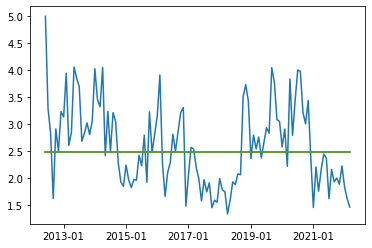

In [9]:
plt.plot(mean_df)
plt.plot(mean_all)
plt.xticks(["2013-01","2015-01","2017-01","2019-01","2021-01"])
plt.show()

In [10]:
load_filename[:-5]
now = datetime.now().strftime("%Y-%m-%d %Hh%Mm")
fileName = '{}_{}.xlsx'.format(load_filename, now)
# mean_df.to_excel('캡스톤월평균데이터'+fileName)